# Library + Data Import

In [1]:
library(data.table)
library(maftools)

In [2]:
# load edits

setwd("/oasis/tscc/scratch/m7huang/COVID_editing/")
load("rdata/merged_rnaedits_filtered_5percent.RData")

In [3]:
# import metadata
ignore_samples <- c("COVSUBJ_0137_1_N_HA", "COVSUBJ_0146_1_N_HA", "COVSUBJ_0376_1_N_HA", 
                    "COVSUBJ_0461_1_N_HA", "COVSUBJ_0558_1_N_HA", "COVSUBJ_0619_1_N_HA")
metadata <- fread("rdata/Updated_Cornell_Metadata_08072020_KF_20210908.txt", sep="\t", stringsAsFactors=FALSE)
metadata$Tumor_Sample_Barcode <- metadata$SampleID
metadata <- subset(metadata, !(Tumor_Sample_Barcode %in% ignore_samples))
edits_filt <- subset(edits_filt, !(Tumor_Sample_Barcode %in% ignore_samples))


options(DelayedArray.block.size=1000000)
edits_filt_metadata <- merge(edits_filt, metadata, by="Tumor_Sample_Barcode")

# Visualization

In [4]:
# import differentially edited samples between COVID-19 and normal samples

pval_table <- read.table("rnaedits/differentialediting_padj_covidvsnone.tsv", header = TRUE)
head(pval_table)
dim(pval_table)

,VarID,YesInfection,NoInfection,p.adj,Hugo_Symbol,Variant_Classification
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,10:113102558,0.08837209,0.04195804,0.005526265,TCF7L2,Intron
2,10:113756312,0.06511628,0.13286713,0.023910137,PLEKHS1,Intron
3,10:114292023,0.08372093,0.02331002,0.031808498,VWA2,3'UTR
4,10:114292067,0.12558140,0.25641026,0.006229833,VWA2,3'UTR
5,10:114292118,0.02790698,0.07226107,0.034714124,VWA2,3'UTR
6,10:114292259,0.03255814,0.09324009,0.004580310,VWA2,3'UTR


[1] 1523    6

In [5]:
# subset data in edits for VarIDs that are differentially edited between COVID-19 and normal samples
# keep columns required for maf files

head(edits_filt)
edits_by_pval <- subset(edits_filt, select = c("VarID", "Chromosome", "Start_Position", 
                                                     "End_Position", "Variant_Classification",
                                                     "Variant_Type", "Tumor_Sample_Barcode", 
                                                     "Reference_Allele", "Tumor_Seq_Allele2"))
edits_by_pval <- subset(edits_by_pval, VarID %in% pval_table$VarID)
names(edits_by_pval)[names(edits_by_pval) == 'VarID'] <- 'Hugo_Symbol'
head(edits_by_pval)

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,⋯,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos,Alu,VAF,strand,mutsig,VarID
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
A4GALT,0,.,hg38,22,42687216,42687216,3'Flank,SNP,T,⋯,NA,NA,NA,NA,42687216,Alu,0.3846154,-,T>C,22:42687216
A4GALT,0,.,hg38,22,42689617,42689617,3'Flank,SNP,T,⋯,NA,NA,NA,NA,42689617,Alu,0.6000000,-,T>C,22:42689617
A4GALT,0,.,hg38,22,42698007,42698007,Intron,SNP,T,⋯,NA,NA,NA,NA,42698007,Alu,0.4166667,-,T>C,22:42698007
A4GALT,0,.,hg38,22,42698196,42698196,Intron,SNP,T,⋯,NA,NA,NA,NA,42698196,Alu,0.6250000,-,T>C,22:42698196
A4GALT,0,.,hg38,22,42698217,42698217,Intron,SNP,T,⋯,NA,NA,NA,NA,42698217,Alu,0.7142857,-,T>C,22:42698217
A4GALT,0,.,hg38,22,42699212,42699212,Intron,SNP,T,⋯,NA,NA,NA,NA,42699212,Alu,0.3076923,-,T>C,22:42699212


Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Tumor_Sample_Barcode,Reference_Allele,Tumor_Seq_Allele2
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
10:15075794,10,15075794,15075794,3'UTR,SNP,COVSUBJ_0001_1_P_HA,T,C
X:23740244,X,23740244,23740244,Intron,SNP,COVSUBJ_0001_1_P_HA,T,C
X:23740245,X,23740245,23740245,Intron,SNP,COVSUBJ_0001_1_P_HA,T,C
4:184781055,4,184781055,184781055,Intron,SNP,COVSUBJ_0001_1_P_HA,T,C
4:184781086,4,184781086,184781086,Intron,SNP,COVSUBJ_0001_1_P_HA,T,C
4:184786822,4,184786822,184786822,Intron,SNP,COVSUBJ_0001_1_P_HA,T,C


In [6]:
# create mock data to allow for the displaying of all samples in oncoplot

mock_data <- data.frame(unique(edits_by_pval$Tumor_Sample_Barcode))
colnames(mock_data) <- "Tumor_Sample_Barcode"
dim(mock_data)

[1] 681   1

In [7]:
mock_data$Hugo_Symbol <- rep("NA",times=681)
mock_data$Chromosome <- rep("NA",times=681)
mock_data$Start_Position <- rep("0",times=681)
mock_data$End_Position <- rep("0",times=681)
mock_data$Variant_Classification <- rep("NA", times=681)
mock_data$Variant_Type <- rep("NA",times=681)
mock_data$Reference_Allele <- rep("NA",times=681)
mock_data$Tumor_Seq_Allele2 <- rep("NA",times=681)

head(mock_data)

,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,COVSUBJ_0001_1_P_HA,NA,NA,0,0,NA,NA,NA,NA
2,COVSUBJ_0002_1_N_HA,NA,NA,0,0,NA,NA,NA,NA
3,COVSUBJ_0003_1_P_HA,NA,NA,0,0,NA,NA,NA,NA
4,COVSUBJ_0004_2_N_HA,NA,NA,0,0,NA,NA,NA,NA
5,COVSUBJ_0006_1_N_HA,NA,NA,0,0,NA,NA,NA,NA
6,COVSUBJ_0007_1_N_HA,NA,NA,0,0,NA,NA,NA,NA


In [8]:
unique(edits_by_pval$Variant_Classification)

[1] "3'UTR"             "Intron"            "3'Flank"          
[4] "RNA"               "Missense_Mutation" "5'Flank"          
[7] "5'UTR"

In [9]:
# create MAF object with clinical data
laml = read.maf(maf = rbind(edits_by_pval, mock_data),
                clinicalData = edits_filt_metadata, vc_nonSyn = c('Intron', '3\'UTR', '3\'Flank', '5\'Flank',
                                                                 '5\'UTR', 'Missense_Mutation', 'Splice_Region',
                                                                 'Splice_Site', 'NA'))
laml

-Validating
--Non MAF specific values in Variant_Classification column:
  NA
--Non MAF specific values in Variant_Type column:
  NA
-Silent variants: 184 
-Summarizing
-Processing clinical data
-Finished in 00:02:33 elapsed (00:02:28 cpu) 


An object of class  MAF 
                   ID summary    Mean Median
 1:        NCBI_Build      NA      NA     NA
 2:            Center      NA      NA     NA
 3:           Samples     681      NA     NA
 4:            nGenes    1520      NA     NA
 5:           3'Flank    9286  13.636      9
 6:             3'UTR   34444  50.579     39
 7:           5'Flank    1147   1.684      0
 8:             5'UTR      58   0.085      0
 9:            Intron   63152  92.734     43
10: Missense_Mutation     288   0.423      0
11:                NA     681   1.000      1
12:             total  109056 160.141    102

In [10]:
# find top 10 sites by p.adj value

p_val <- merge(pval_table, edits_by_pval, by.x = c("VarID", "Variant_Classification"), by.y = c("Hugo_Symbol", "Variant_Classification")) 
p_val = subset(p_val, select = c(VarID, p.adj) )
names(p_val)[names(p_val) == 'VarID'] <- 'Hugo_Symbol'
p_val <- p_val[!duplicated(p_val),]
p_val$p.adj <- -log(p_val$p.adj)
head(p_val[order(-p_val$p.adj),], n = 10)
oncoplot_genes <- c(head(p_val[order(-p_val$p.adj),], n = 10)$Hugo_Symbol, "NA")

,Hugo_Symbol,p.adj
,<chr>,<dbl>
86181,4:88400238,168.0554
18923,12:50930762,143.1230
86098,4:88399696,140.4166
16579,12:112976114,140.0001
48147,19:17401923,129.9461
103747,9:32482751,123.5859
86453,4:88404441,120.7787
63333,2:6838123,116.1980
48049,19:17401393,114.8196


In [11]:
# create list of colors for the clinical data

type_color <- c("#81abce", "#8ead98", "#f6bd60", "#f578a0", "#9080a7")
names(type_color) = c('None', 'Low', 'Medium', 'High', 'OtherViralInfection')
rt_color <- c("#5bb0a7", "#f9b12e")
names(rt_color) = c('Detected', 'Not Detected')
color_list <- list(Type = type_color, RT_PCR_Result = rt_color)

In [12]:
# set colors for mutations

vc_cols <- c("#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", "#FFFFFF")
names(vc_cols) = c('Intron', 'Multi_Hit', '3\'Flank', '3\'UTR', 'NA')
vc_cols 

Intron Multi_Hit   3'Flank     3'UTR        NA 
"#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#FFFFFF"

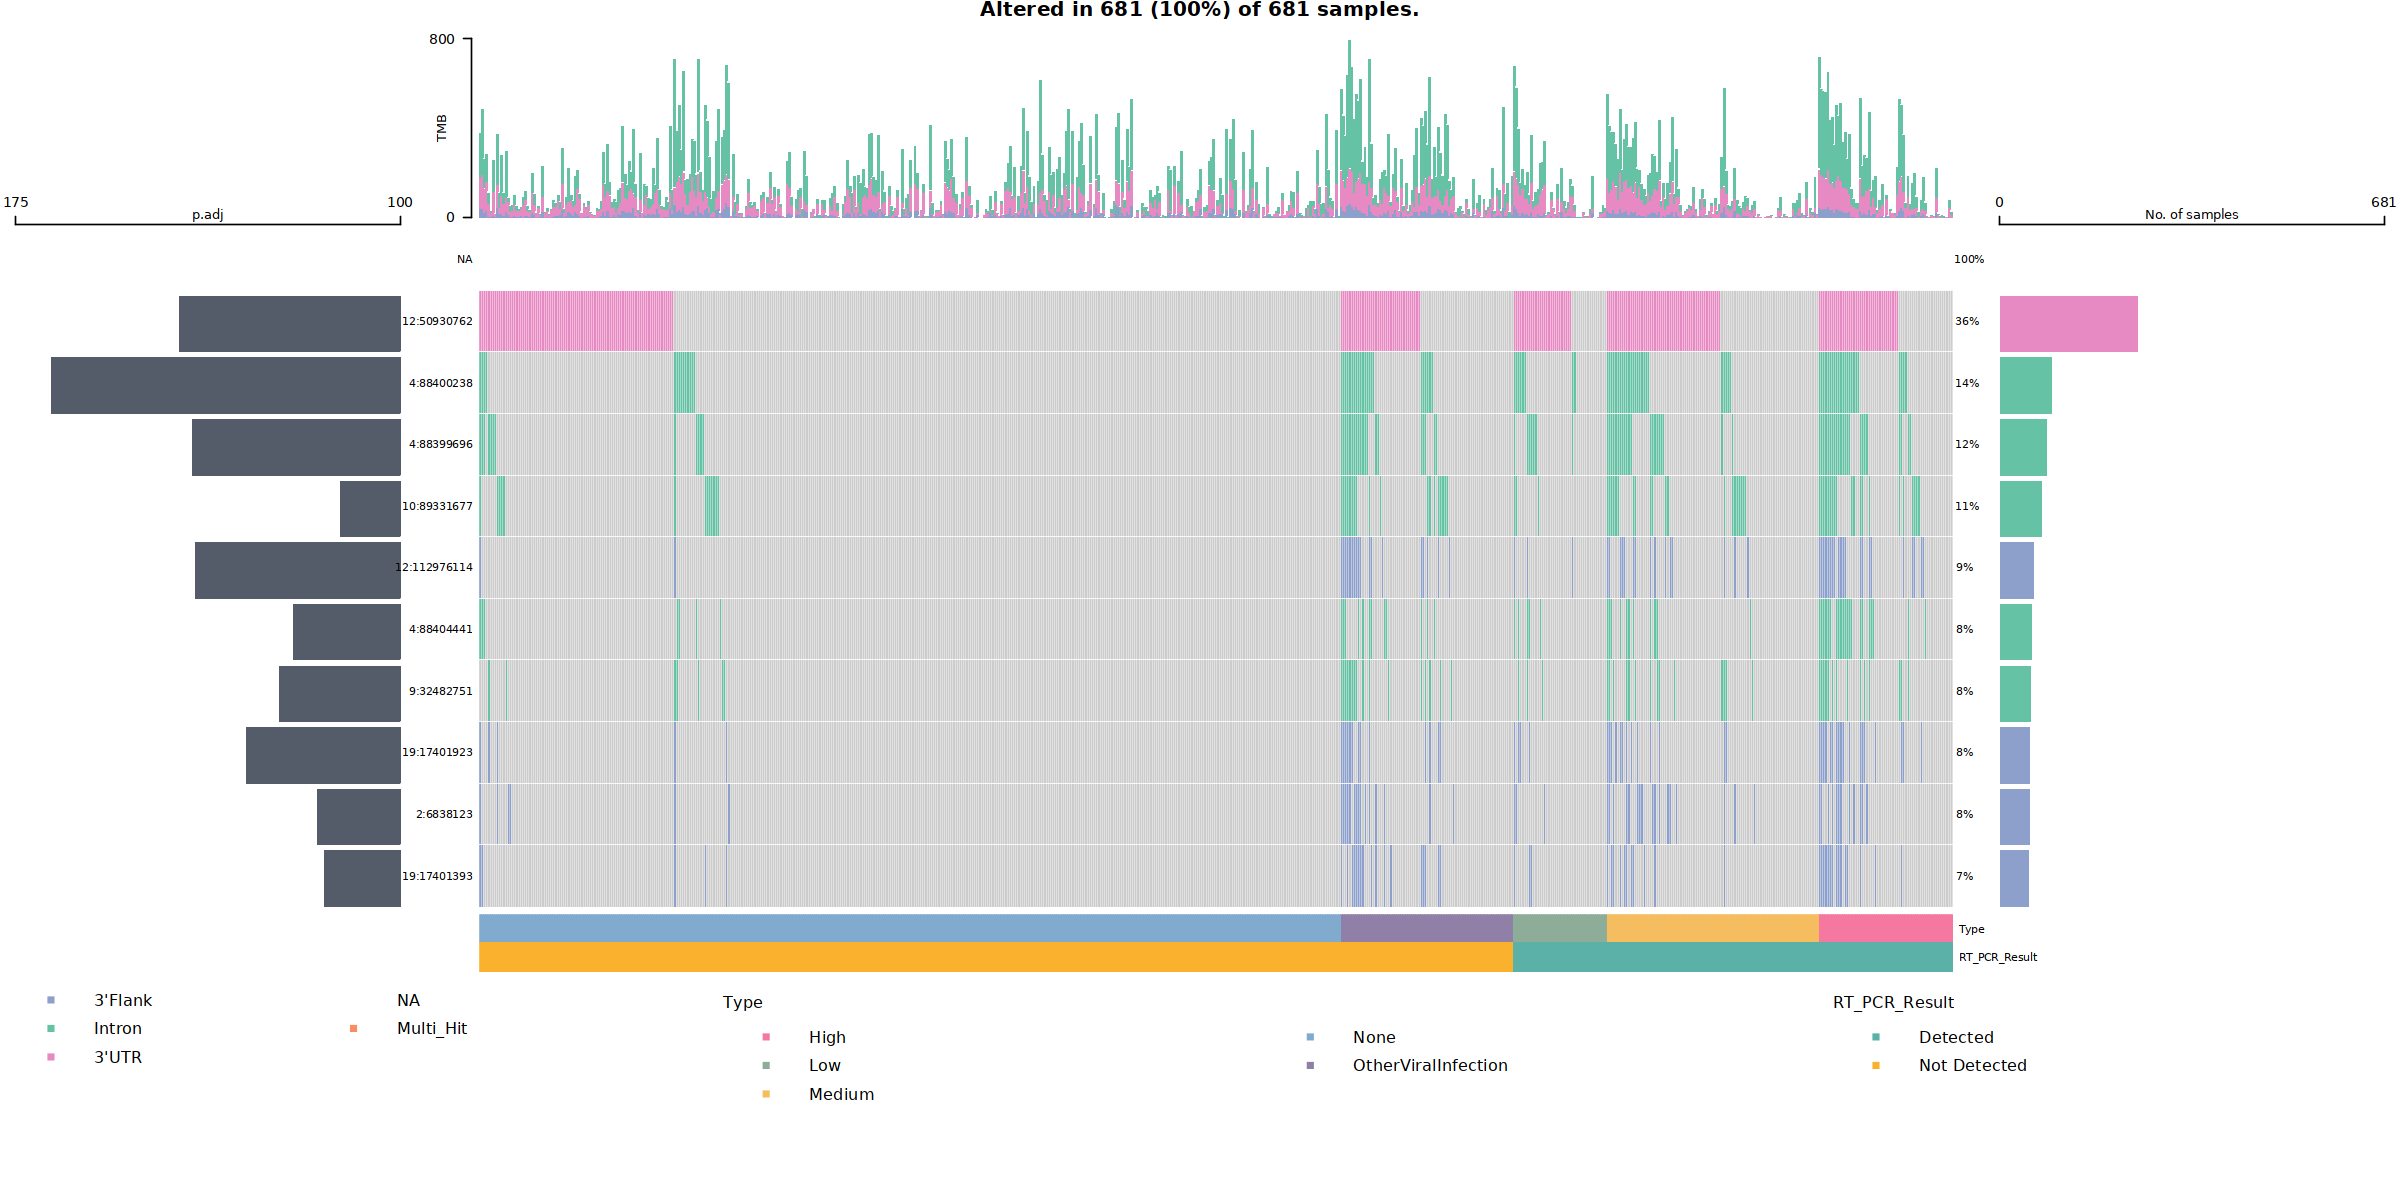

In [13]:
options(repr.plot.width=20, repr.plot.height=10)

oncoplot(maf = laml, genes = oncoplot_genes, colors = vc_cols,
         clinicalFeatures = c('Type', 'RT_PCR_Result'), sortByAnnotation = TRUE, fontSize = 0.5, 
         leftBarData = p_val, leftBarLims = c(100, 175), annotationColor = color_list,
         annotationOrder = c('None','OtherViralInfection', 'Low', 'Medium', 'High'))

In [14]:
pdf("20231129_covnorm_oncoplot.pdf", width = 15, height = 10)

oncoplot(maf = laml, genes = oncoplot_genes, colors = vc_cols,
         clinicalFeatures = c('Type', 'RT_PCR_Result'), sortByAnnotation = TRUE, fontSize = 0.5, 
         leftBarData = p_val, leftBarLims = c(100, 175), annotationColor = color_list,
         annotationOrder = c('None','OtherViralInfection', 'Low', 'Medium', 'High'))

dev.off()

png 
  2

-Validating
-Silent variants: 184 
-Summarizing
-Processing clinical data
-Finished in 00:02:26 elapsed (00:02:22 cpu) 


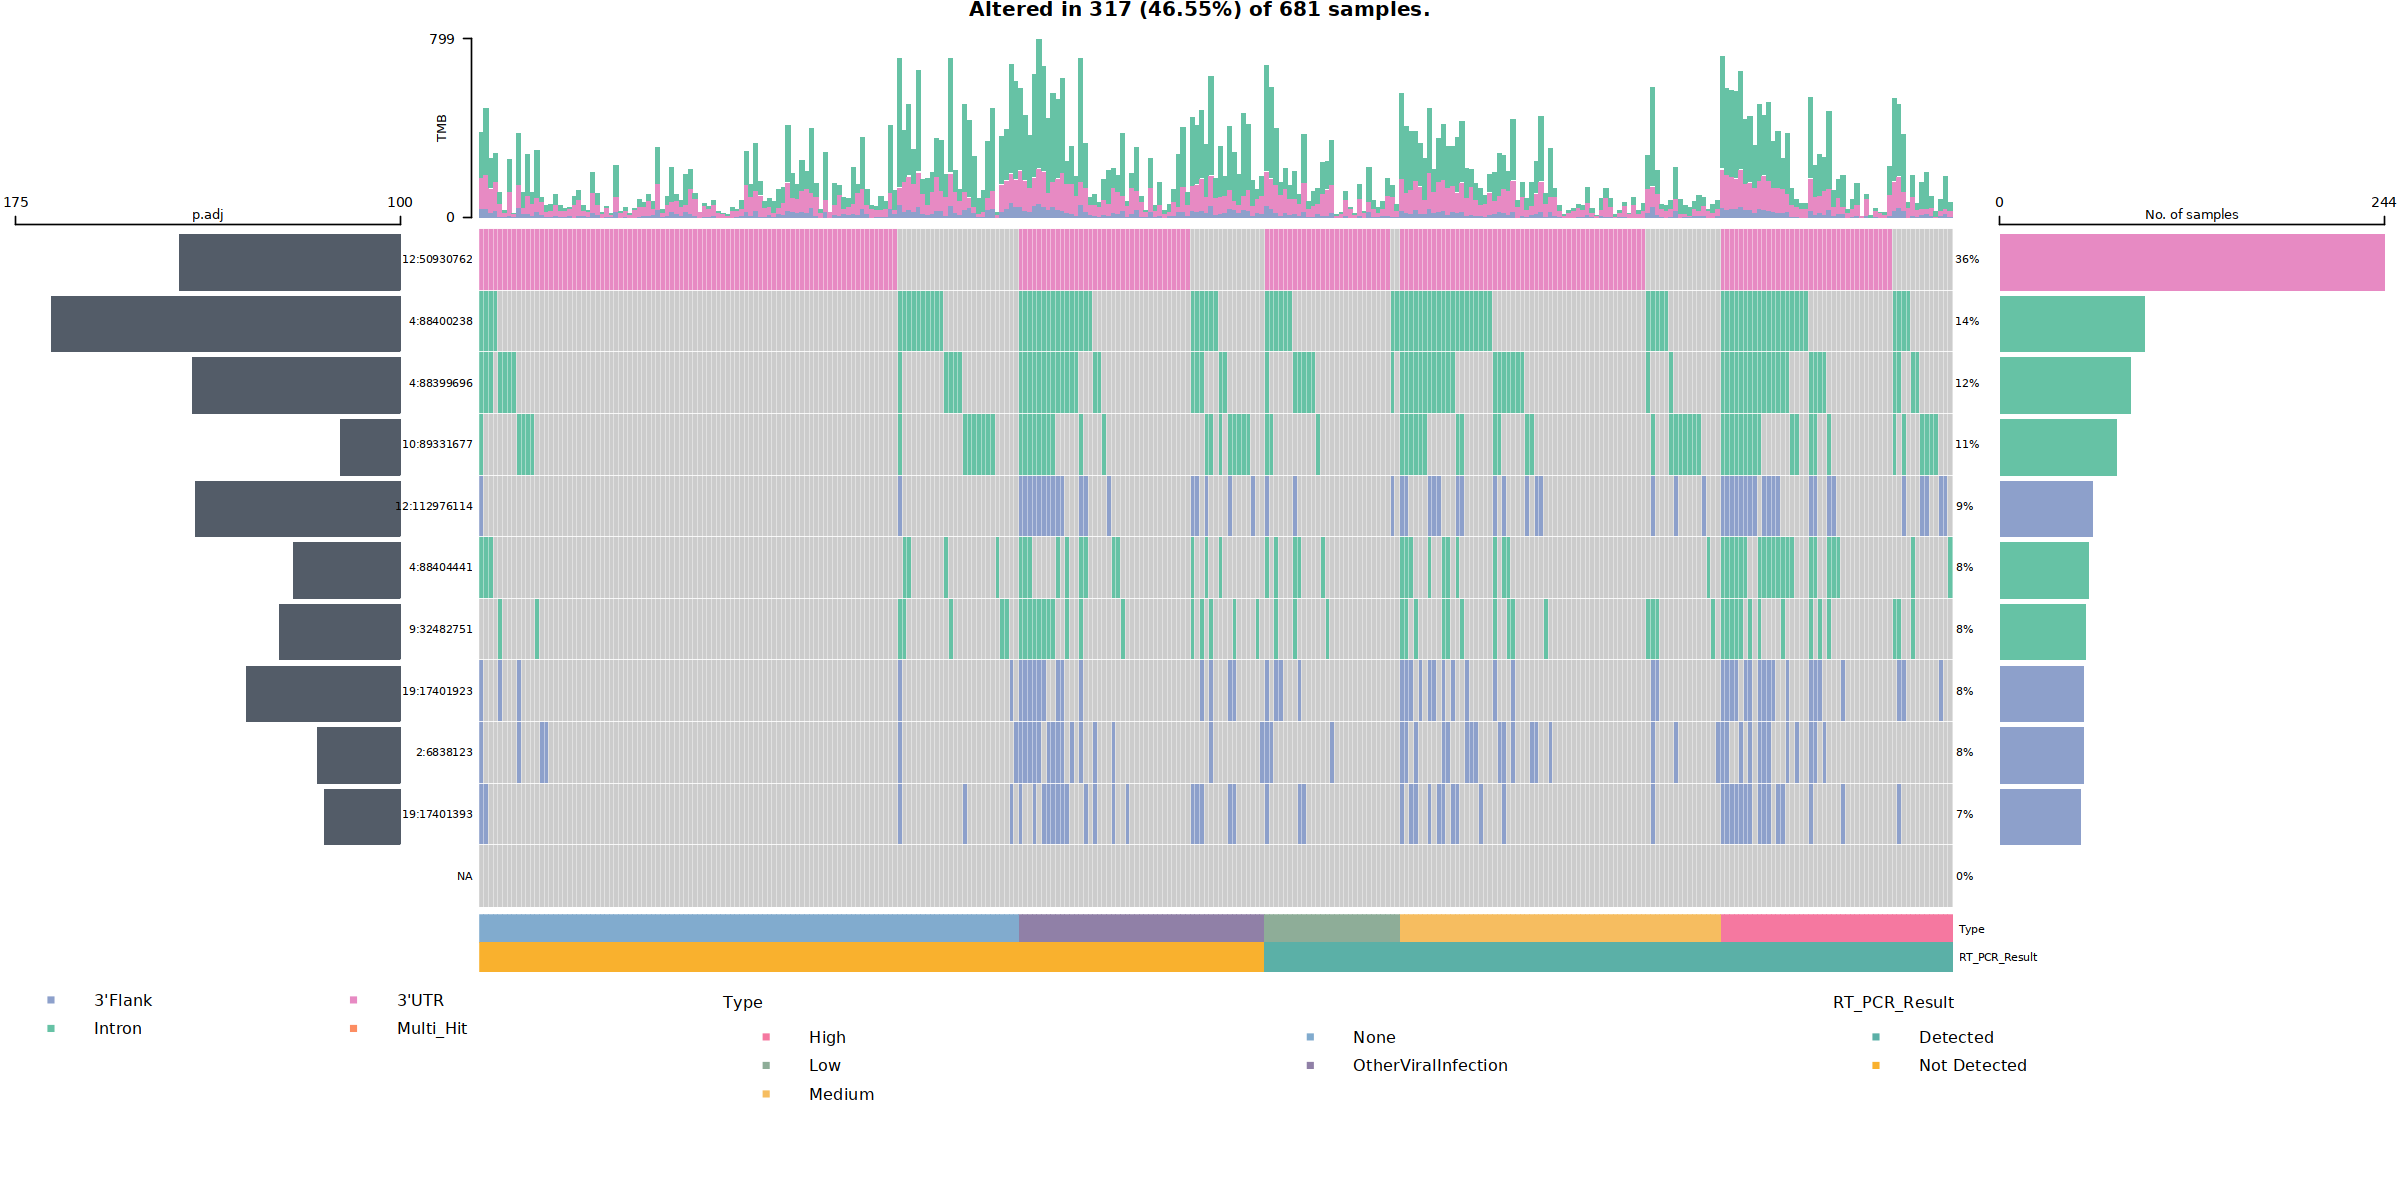

In [15]:
# make sure that the mockdata did not mess with anything

laml = read.maf(maf = edits_by_pval,
                clinicalData = edits_filt_metadata, vc_nonSyn = c('Intron', '3\'UTR', '3\'Flank', '5\'Flank',
                                                                 '5\'UTR', 'Missense_Mutation', 'Splice_Region',
                                                                 'Splice_Site'))

options(repr.plot.width=20, repr.plot.height=10)
oncoplot(maf = laml, genes = oncoplot_genes, colors = vc_cols,
         clinicalFeatures = c('Type', 'RT_PCR_Result'), sortByAnnotation = TRUE, fontSize = 0.5, 
         leftBarData = p_val, leftBarLims = c(100, 175), annotationColor = color_list,
         annotationOrder = c('None','OtherViralInfection', 'Low', 'Medium', 'High'))

In [16]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/m7huang/miniconda3/envs/single_cell_notebook/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] maftools_2.14.0   data.table_1.14.6

loaded via a namespace (and not attached):
 [1] DNAcopy_1.72.3     splines_4.2.2      uuid_1.1-0         lattice_0.20-45   
 [5] rlang_1.1.1        fastmap_1.1.0      fansi_1.0.3        tools_4.2.2       
 [9] grid_4.2.2         utf8_1.2.2      